In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
df = pd.read_csv("3-customersatisfaction.csv")
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


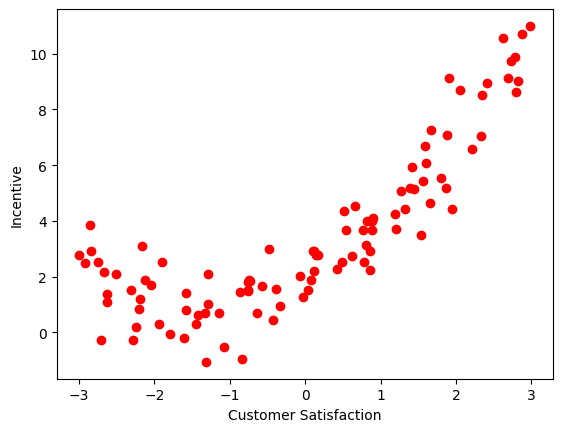

In [12]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"], color ="r")
plt.xlabel('Customer Satisfaction')
plt.ylabel('Incentive')
plt.show()

In [14]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [15]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
regression = LinearRegression()

In [28]:
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# prediction
y_pred = regression.predict(X_test)
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [30]:
score = r2_score(y_test, y_pred)
score

0.2705652535622246

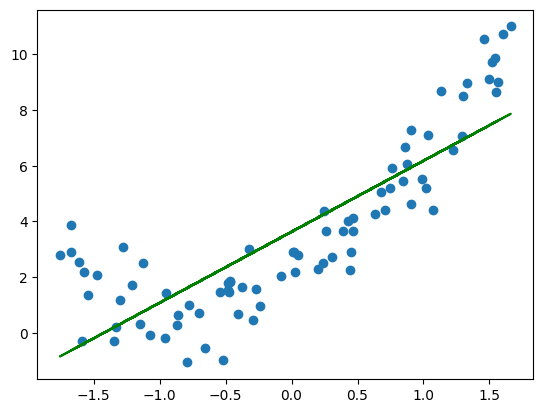

In [33]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = 'g')
plt.show()

In [52]:
poly = PolynomialFeatures(degree = 2, include_bias=True)

In [53]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [54]:
regression2 = LinearRegression()

In [55]:
regression2.fit(X_train_poly, y_train)


LinearRegression()

In [56]:
y_pred = regression2.predict(X_test_poly)
score2 = r2_score(y_test, y_pred)

In [41]:
score2

0.7685687698788557

In [57]:
regression2.coef_

array([0.        , 2.63871762, 1.54959954])

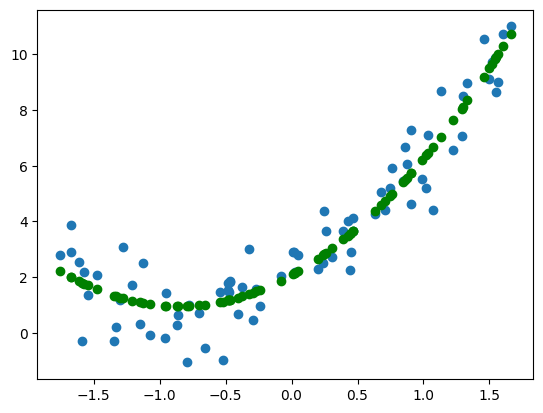

In [58]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression2.predict(X_train_poly), color = 'g')
plt.show()

In [46]:
poly3 = PolynomialFeatures(degree = 3, include_bias=True)
X_train_poly3 = poly3.fit_transform(X_train)    
X_test_poly3 = poly3.transform(X_test)

In [59]:
regression3 = LinearRegression()
regression3.fit(X_train_poly3, y_train)
y_pred = regression3.predict(X_test_poly3)
score3 = r2_score(y_test, y_pred)
score3

0.7573443621401051

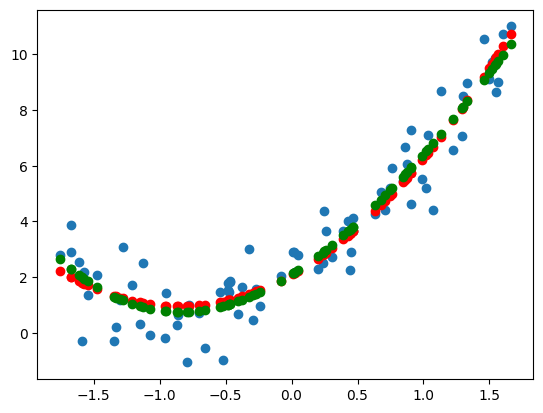

In [60]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression2.predict(X_train_poly), color = 'r')
plt.scatter(X_train, regression3.predict(X_train_poly3), color = 'g')
plt.show()

In [61]:
new_df = pd.read_csv("3-newdatas.csv")
new_df.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [62]:
new_df.rename(columns={"0": "Customer Satisfaction"}, inplace=True)

In [63]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [64]:
X_new = new_df[["Customer Satisfaction"]]
X_new = scaler.fit_transform(X_new)
X_new_poly = poly.transform(X_new)

In [65]:
y_new = regression2.predict(X_new_poly)

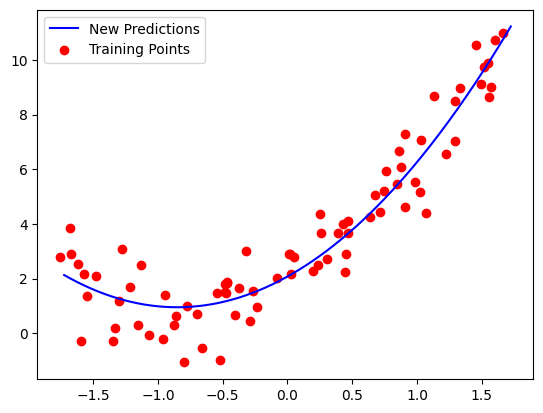

In [68]:
plt.plot(X_new, y_new, color='b', label='New Predictions')
plt.scatter(X_train, y_train, color='r', label='Training Points')
plt.legend()
plt.show()

In [74]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ('standart_scaler', scaler),
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"Degree: {degree}, R^2 Score: {score}")
    
    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, color='b', label='New Predictions')
    plt.scatter(X_train, y_train, color='r', label='Training Points')
    plt.scatter(X_test, y_test, color='g', label='Test Points')
    plt.legend()
    plt.show()



Degree: 1, R^2 Score: 0.2705652535622246


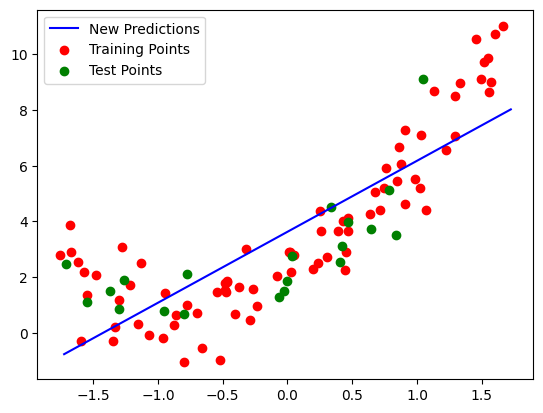

Degree: 2, R^2 Score: 0.7685687698788558


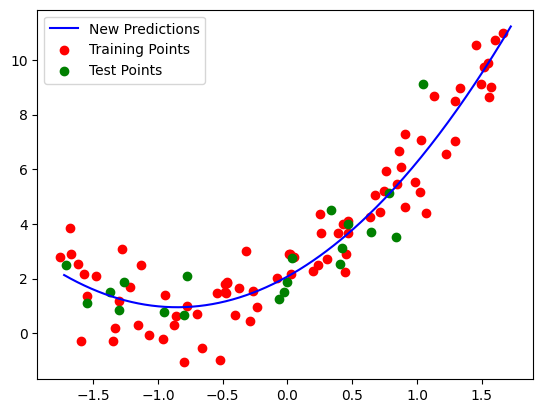

Degree: 3, R^2 Score: 0.7573443621401048


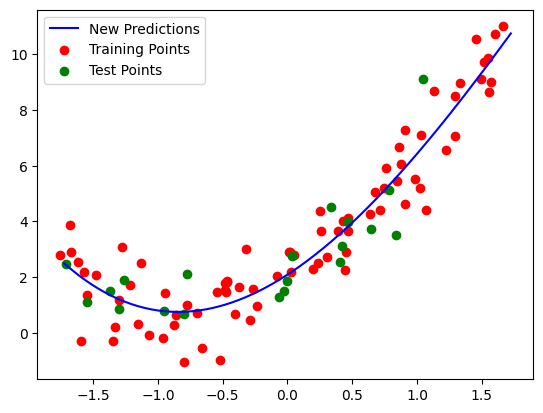

Degree: 4, R^2 Score: 0.7355034443260413


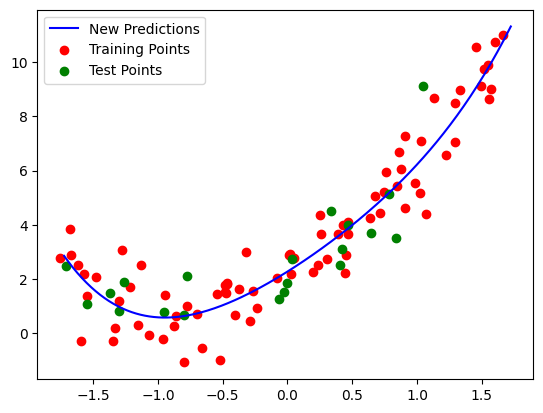

Degree: 5, R^2 Score: 0.7351244165095402


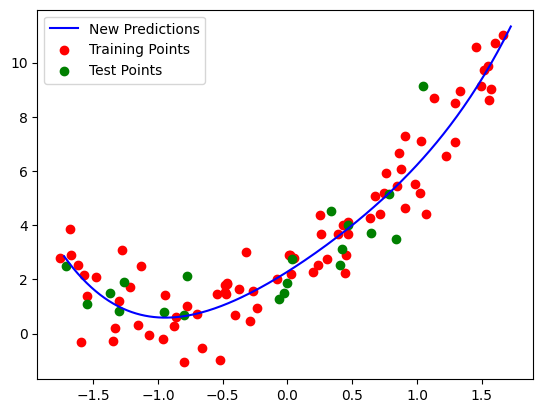

Degree: 6, R^2 Score: 0.734359048213343


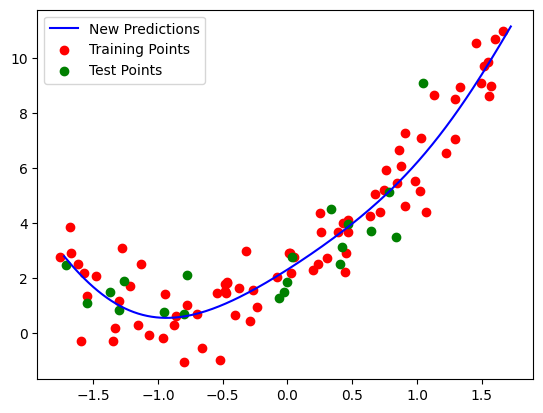

Degree: 7, R^2 Score: 0.7347819263549451


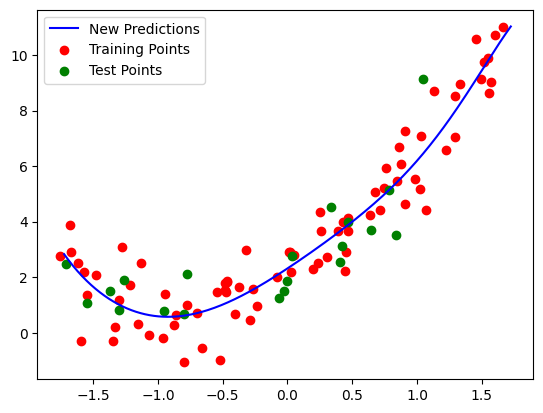

Degree: 8, R^2 Score: 0.7411422099998375


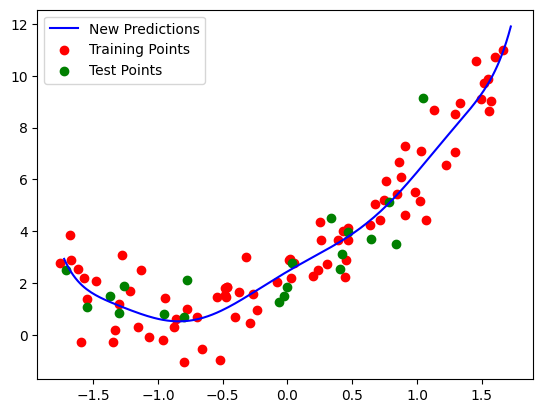

Degree: 9, R^2 Score: 0.7310763879815918


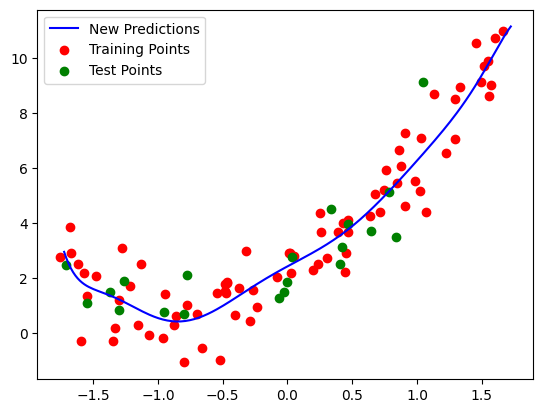

Degree: 10, R^2 Score: 0.728057862123283


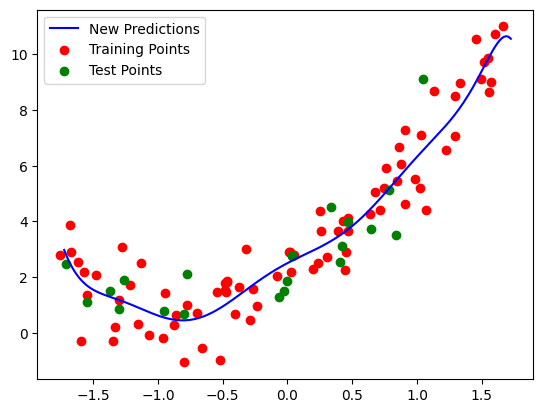

In [75]:
for degree in range(1, 11):
    poly_regression(degree)